In [1]:
from __future__ import print_function
import numpy as np 
import skimage.io as io
import matplotlib.pyplot as plt
import os
from scipy.ndimage import rotate

## Import DHM, PDHM and Mask images

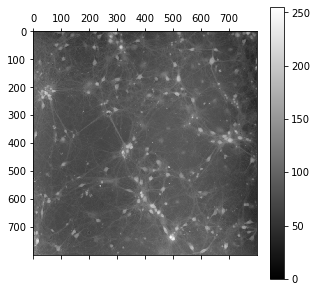

In [2]:
DHM_img = io.imread('/Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/DHM_img/RatNeuron_3_666_Bw_2_5X.tif')
plt.figure(figsize=(5,5))
plt.matshow(DHM_img, cmap='gray', fignum=0)
plt.colorbar()
plt.show()

0
255


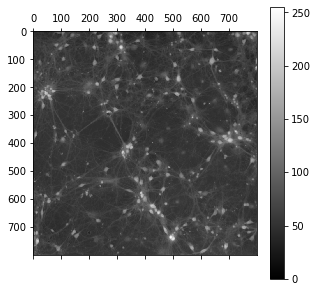

In [3]:
PDHM_img = io.imread('/Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/PDHM_img/Avrg_Bw_5X_3.tif')
print(np.min(PDHM_img))
print(np.max(PDHM_img))
plt.figure(figsize=(5,5))
plt.matshow(PDHM_img, cmap='gray', fignum=0)
plt.colorbar()
plt.show()

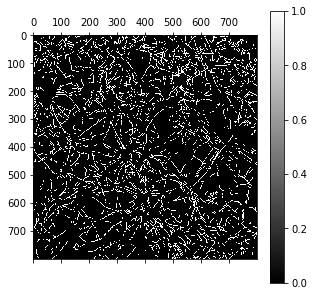

In [4]:

mask = io.imread('/Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/Mask/Avrg_Bw_5X_3_mask.tif')
plt.figure(figsize=(5,5))
plt.matshow(mask,cmap='gray', fignum=0)
plt.colorbar()
plt.show()

#### Converting mask image to 8_bits image with the dynamic range of 0-255

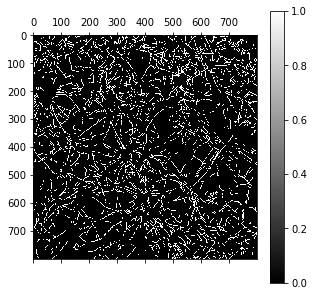

In [176]:
mask_img =np.array( mask , dtype=np.uint8)
mask_img = mask_img>0.99
plt.figure(figsize=(5,5))
plt.matshow(mask_img,cmap='gray', fignum=0)
plt.colorbar()
plt.show()

## Rotating images
Angle of rotation: [15,30,45,60,75,90]

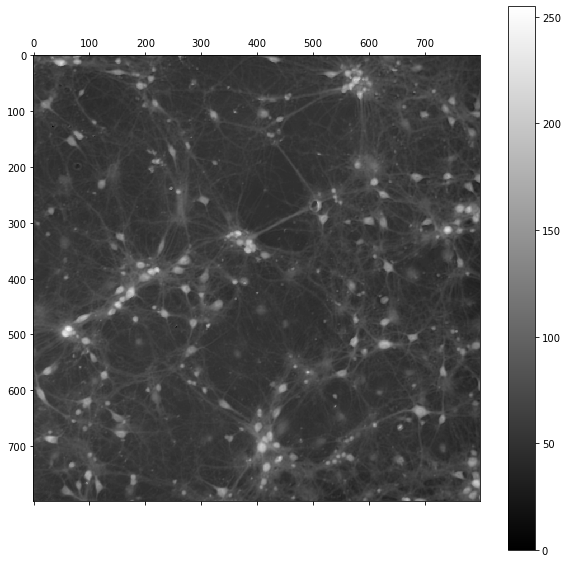

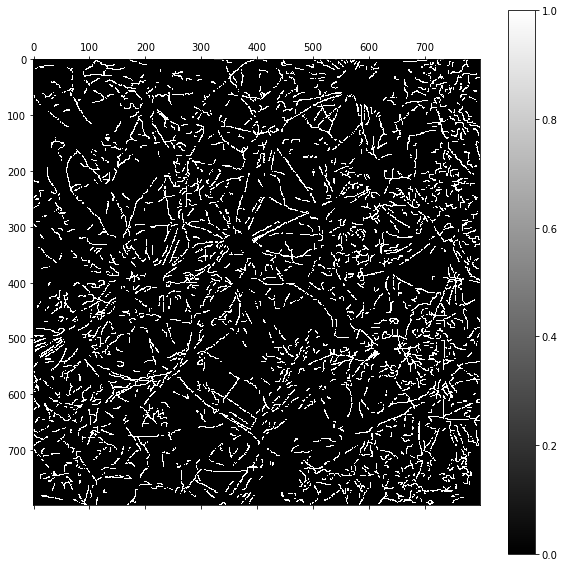

In [177]:
DHM_img = rotate(DHM_img, angle=-90)
PDHM_img = rotate(PDHM_img, angle=-90)
mask_img = rotate(mask_img, angle=-90)
plt.figure(figsize=(10,10))
plt.matshow(PDHM_img,cmap='gray', fignum=0)
plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.matshow(mask_img,cmap='gray', fignum=0)
plt.colorbar()
plt.show()

#### Saving rotated images

In [56]:
save_path = '/Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/img_rotate'
io.imsave(os.path.join(save_path,"RatNeuron_2_666_Bw_2_5X_RT_90.tif"),DHM_img_90)
io.imsave(os.path.join(save_path,"Avrg_Bw_5x_2_RT_90.tif"),PDHM_img_90)
io.imsave(os.path.join(save_path,"Avrg_Bw_5x_2_mask_RT_90.tif"),mask_img_90)

/var/folders/v5/bwhfmjqj76q64_jsz9fyv3z40000gn/T/ipykernel_2172/2910617275.py:4: UserWarning: /Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/img_rotate/Avrg_Bw_5x_2_mask_RT_90.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(save_path,"Avrg_Bw_5x_2_mask_RT_90.tif"),mask_img_90)


## Randomly cut DHM, PDHM, and Mask images

Cut size (matrix) is[128,128].

Sample size is 50.

For cropping out black borders please have a look on this:
[stackoverflow](https://stackoverflow.com/questions/16702966/rotate-image-and-crop-out-black-borders)

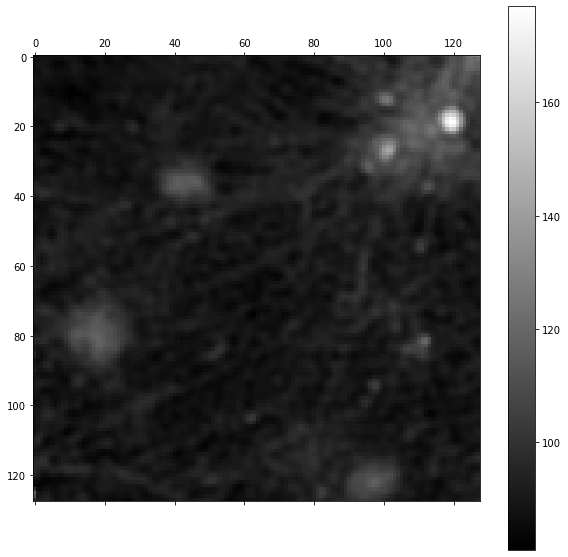

44
156


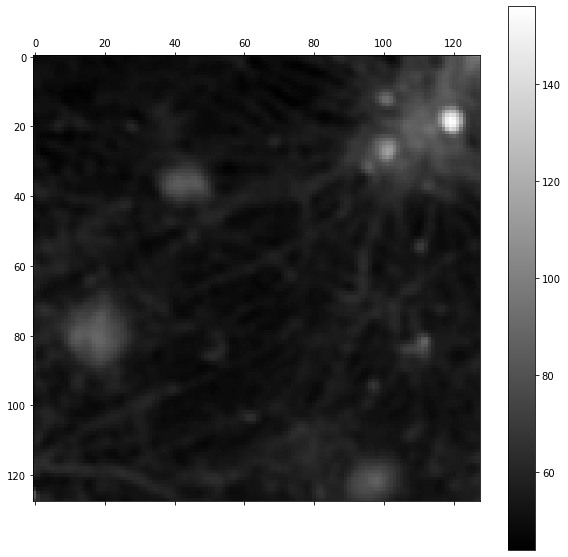

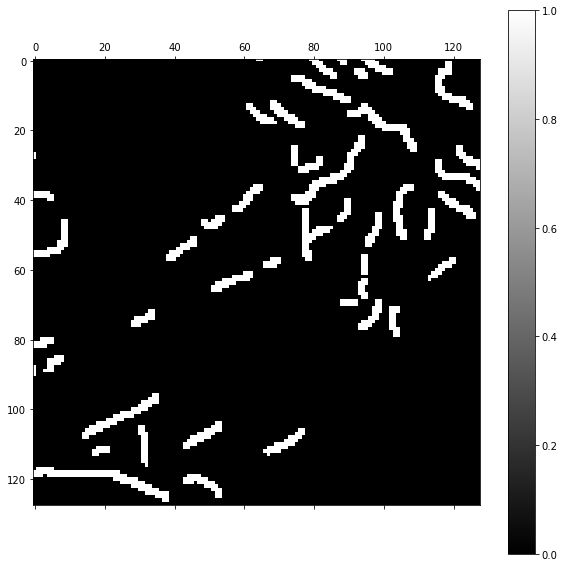

In [16]:
from PIL import Image
from random import randrange
save_path = '/Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/img_crop'
x, y = np.shape(PDHM_img)
matrix = 128
sample = 50
DHM_img_list = []
PDHM_img_list =[]
mask_list = []
XX =[]
YY=[]
for i in range(sample):
    x1 = randrange(0, x - matrix) #0:0,15:170,30:258,45:280,60:250,75:160,90:0
    XX.append(x1)
    y1 = randrange(0, y - matrix)
    YY.append(y1)
    DHM_img_list.append(DHM_img[x1:x1 + matrix, y1:y1 + matrix])
    mask_list.append(mask[x1:x1 + matrix, y1:y1 + matrix])
    PDHM_img_list.append(PDHM_img[x1:x1 + matrix, y1:y1 + matrix])
    io.imsave(os.path.join(save_path,"RatNeuron_3_666_Bw_2_5X_RT_270_"+str(i)+".tif"),DHM_img[x1:x1 + matrix, y1:y1 + matrix])
    io.imsave(os.path.join(save_path,"Avrg_Bw_5x_3_RT_270_"+str(i)+".tif"),PDHM_img[x1:x1 + matrix, y1:y1 + matrix])
    io.imsave(os.path.join(save_path,"Avrg_Bw_5x_3_mask_RT_270_"+str(i)+".tif"),mask_img[x1:x1 + matrix, y1:y1 + matrix])
plt.figure(figsize=(10,10))
plt.matshow(DHM_img_list[1], cmap='gray', fignum=0)
plt.colorbar()
plt.show()
print(np.min(PDHM_img_list[1]))
print(np.max(PDHM_img_list[1]))
plt.figure(figsize=(10,10))
plt.matshow(PDHM_img_list[1], cmap='gray', fignum=0)
plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.matshow(mask_list[1], cmap='gray', fignum=0)
plt.colorbar()
plt.show()
